# IMDB - EDA

**IMDB**-  is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

Basic information about dataset:

* Poster_Link - Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year - Year at which that movie released
* Certificate - Certificate earned by that movie
* Runtime - Total runtime of the movie
* Genre - Genre of the movie
* IMDB_Rating - Rating of the movie at IMDB site
* Overview - mini story/ summary
* Meta_score - Score earned by the movie
* Director - Name of the Director
* Star1,Star2,Star3,Star4 - Name of the Stars
* Noofvotes - Total number of votes
* Gross - Money earned by that movie


Data shape:
* number of rows: 1000
* number of columns: 16

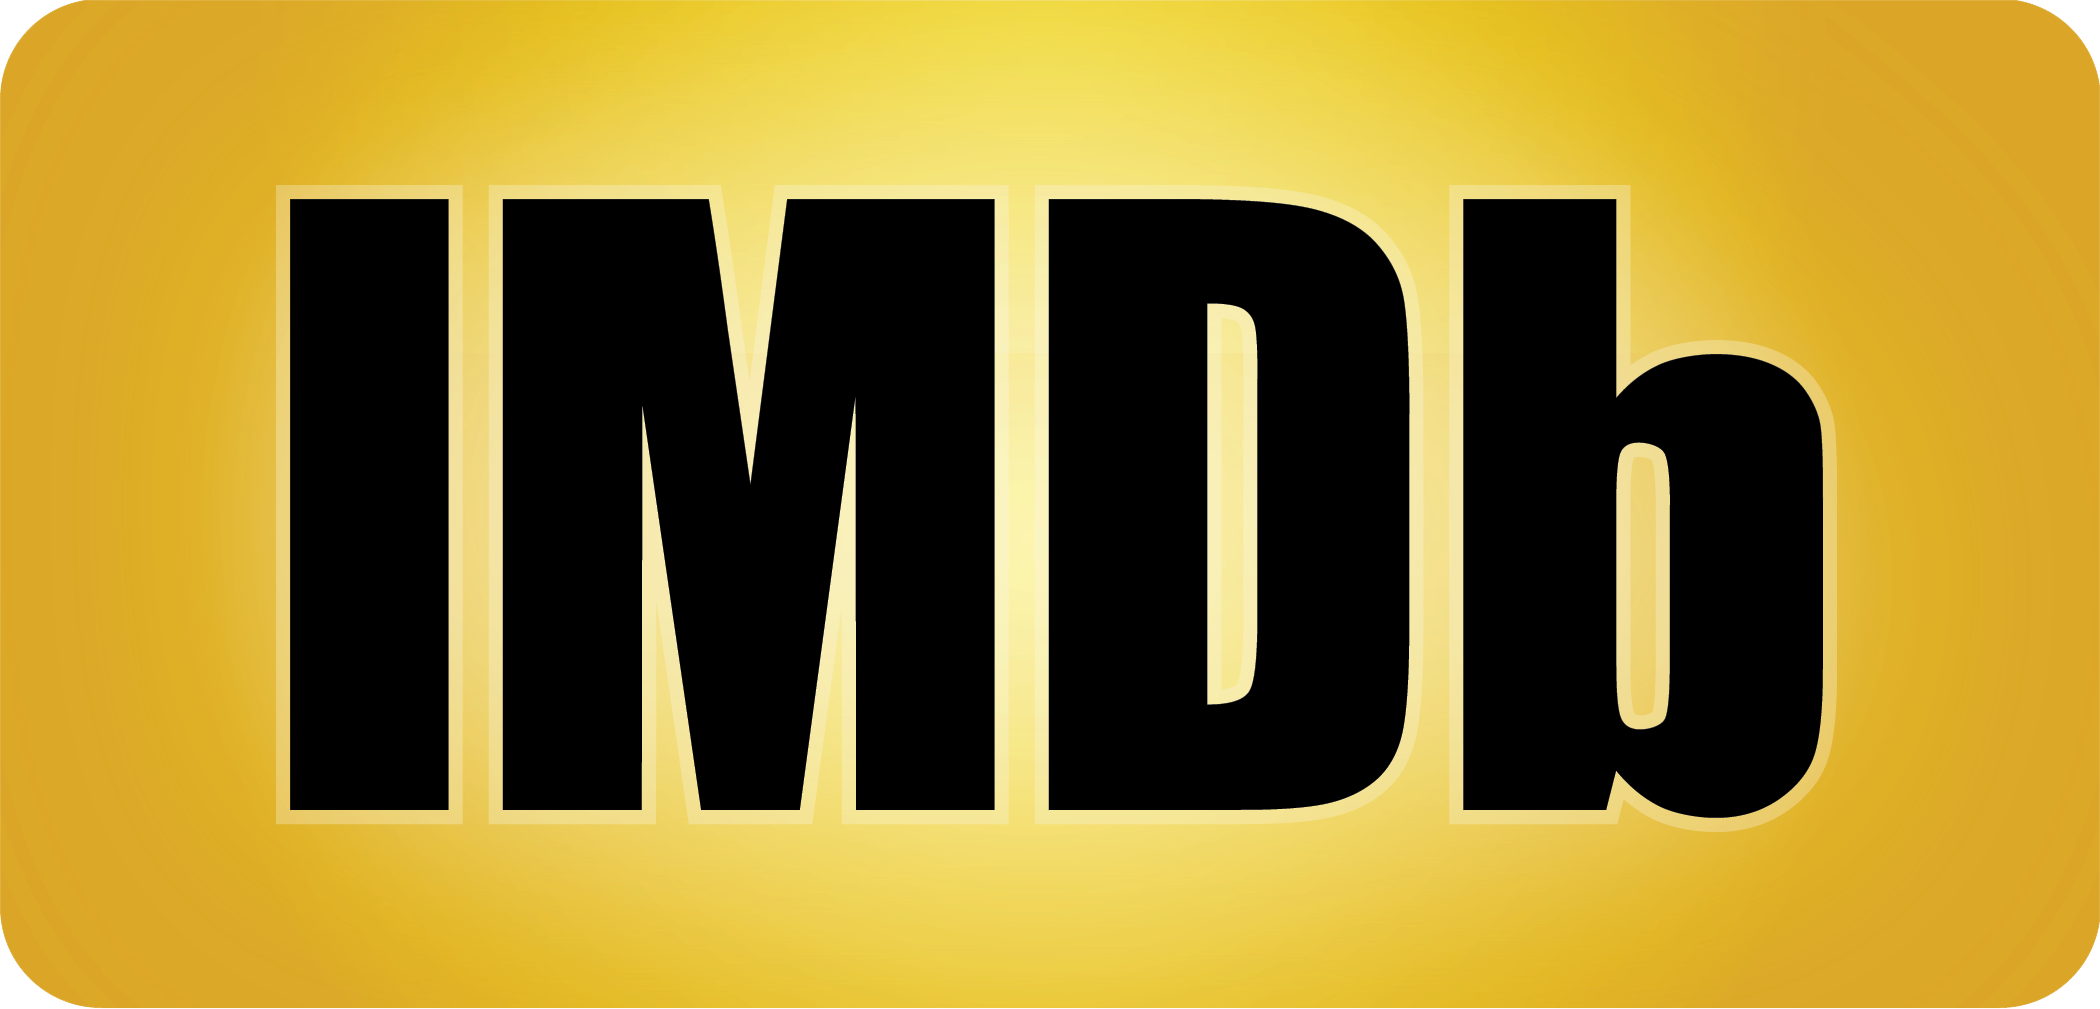

## 1. Data preprocessing

### 1.1 Importing modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")


import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = pd.read_csv('imdb_top_1000.csv')

In [2]:
df.head(3)

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444

In [3]:
df.tail()

Poster_Link  \
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

               Series_Title Released_Year Certificate  Runtime  \
995  Breakfast at Tiffany's          1961           A  115 min   
996                   Giant          1956           G  201 min   
997   From Here to Eternity          1953      Passed  118 min   
998                Lifeboat          1944         NaN   97 min   
999            The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview  Meta_score  \
995  A young New York socialite becomes interested ...        76.0   
996  Sprawling epic covering the life of a Texas ca...        84.0   
997  In Hawaii in 1941, a private is cruelly punish...        85.0   
998  Several survivors of a torpedoed merchant ship...        78.0   
999  A man in London tries to help a counter-espion...        93.0   

             Director              Star1              Star2           Star3  \
995     Blake Edwards     Audrey Hepburn     George Peppard   Patricia Neal   
996    George Stevens   Elizabeth Taylor        Rock Hudson      James Dean   
997    Fred Zinnemann     Burt Lancaster   Montgomery Clift    Deborah Kerr   
998  Alfred Hitchcock  Tallulah Bankhead        John Hodiak   Walter Slezak   
999  Alfred Hitchcock       Robert Donat  Madeleine Carroll  Lucie Mannheim   

              Star4  No_of_Votes       Gross  
995     Buddy Ebsen       166544         NaN  
996   Carroll Baker        34075         NaN  
997      Donna Reed        43374  30,500,000  
998  William Bendix        26471         NaN  
999  Godfrey Tearle        51853         NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


there's 3 numeric columns by now, gross should be numeric so i'm going to conver it . Runtime is numeric as well and will be converted as well.
All in all there's 5 numeric values

In [5]:
df['Gross'] = df['Gross'].str.replace(',', '').astype('float')
df['Runtime'] = df['Runtime'].apply(lambda text: text.split()[0]).astype('int')

In [6]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

There's null values in columns:

* Certificate - replace null value with Unknown string
* Meta_score - replace null values with mean
* Gross - as with meta_score

In [7]:
df['Certificate'] = df['Certificate'].replace(np.nan, 'Unknown')
df['Meta_score'] = df['Meta_score'].replace(np.nan, np.mean(df['Meta_score']))
df['Gross'] = df['Gross'].replace(np.nan, np.mean(df['Gross']))

In [8]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

## 2. Data visualizations

* Movies count and year of the release

In [9]:
fig = px.histogram(data_frame=df.sort_values(by='Released_Year'), x='Released_Year', 
                   color_discrete_sequence=['gold'])

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>Distributions of IMBD movies from<b> 1920 - now',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Year of release', showgrid=False),
                 yaxis=dict(showgrid=False))

* Distribution is **left skewed**
* there's some peaks in 1962, in 1993 and in 2004
* the bigest amount of the movies is in 2014 - 32
* 2020 is a bad year - no surprise because Covid-19 made movies was hard to record and distribute

### Genres

In [10]:
df['Genre'].unique()[:5]

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History'],
      dtype=object)

I'm going to left only the first category from the left side, for instance:
when there's 'Crime, Drama' only leave Crime as main genre of the movie

In [11]:
df['genre'] = df['Genre'].apply(lambda text: text.split(',')[0])
df.drop(columns='Genre', inplace=True)
df['genre'].value_counts()

Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: genre, dtype: int64

### BAR PLOT

In [12]:
def bar_plot(column_name, data_frame=df, tribe='value_counts', by=None, limit=3, **kwargs):
    
    """arguments:
    column_name:str name of column from pandas data drame
    data_frame:pandas data frame default df
    tribe:str value counts by default, change to 'sort'
    by:str works only if sort tribe chosed, takes name of the column
        you want to sort values by"
    limit:int limit of values displayed"""
    
    
    # if column is not str type or column not in columns of data frame
    if type(column_name) != str or column_name not in data_frame.columns:
        raise ValueError('Incorect column name or type')
        
    if type(limit) != int:
        raise ValueErroc(f'excepted int type, got {type(limit)}')
    
    
    # sorted data frame
    if tribe == 'sort' :
        # if column is not in data frame
        if not by or by not in data_frame.columns:
            raise ValueError('by paramter must be column from data frame!')
        data = data_frame.sort_values(by=by, ascending=False).head(limit)
        y = data[by].values
        x = data[column_name]
        title = by
    
    # value counts
    elif tribe == 'value_counts':
        data = data_frame[column_name].value_counts().head(limit)
        x=data.index
        y=data.values
        title = column_name
    
    
    fig = px.bar(x=x, 
                 y=y,
            color_discrete_sequence=['gold']
                )

    fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text=f'<b>IMBD movies - {title}',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis=dict(title=f'{title}', showgrid=False),
                 yaxis=dict(title=f'count', showgrid=False))
        
    fig.show()

In [13]:
bar_plot('genre', limit=5)

### KDE PLOT

In [14]:
def add_mean_line(data=df, var='Runtime', **kwargs):
    
    #  If no variable provided skip adding mean line
    if not var: return
    
    #  Calculating mean value for each group
    mean = np.mean(data['Runtime'])
    
    #  Get current axis
    ax = plt.gca()
    
    #  Adding line at group mean
    
    ax.axvline(mean, color='red', lw=3, ls='--', alpha=.7) 
    
    #  Annotate group mean
    x_pos = 0.75
    fontsize = 12
    
    if mean < 120:
        x_pos=.65

    ax.text(x_pos, 0.7, f'mean:{mean: .0f}',
            transform = ax.transAxes, 
            color = 'red', fontweight='bold', fontsize=fontsize)


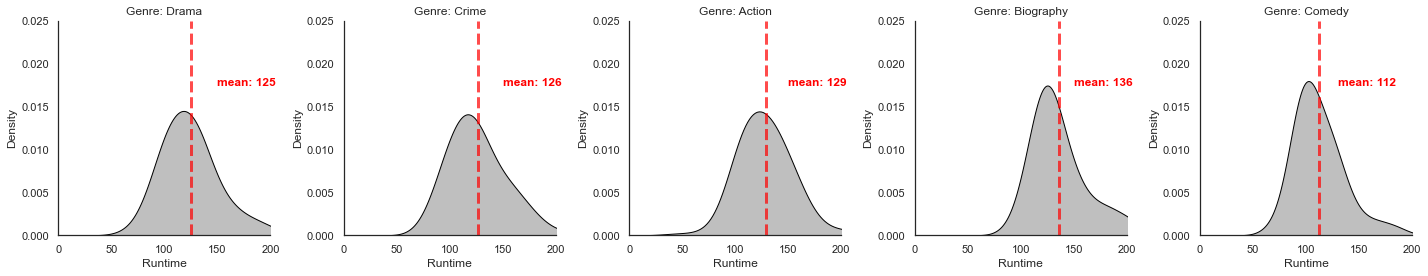

In [15]:
g = sns.FacetGrid(df[df['genre'].isin(['Drama', 'Crime', 'Action', 'Comedy', 'Biography'])], col='genre', height=4,
                 sharex=False, sharey=False, xlim=(0,200), ylim=(0,.025))
g.map(sns.kdeplot, 'Runtime', shade=True, color='black', bw=.5)
g.map_dataframe(add_mean_line)
g.set_titles(col_template='Genre: {col_name}');

Conclusions: 
* Drama seems to be the most popular genre
* There's no big difference in mean runtime over genres

### Gross

### SCATTER PLOT

In [16]:
fig = px.scatter(df, x='Gross', y='No_of_Votes', hover_data=['Series_Title'],
                color='genre')

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>IMDB MOVIES - SCATTER PLOT<B>',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis=dict(title='Gross', showgrid=False),
                 yaxis=dict(title='Number of votes', showgrid=False))

### **TOP 3 MOVIES - GROSS**

In [17]:
bar_plot('Series_Title', tribe='sort', by='Gross')

### Runtime

### BAR PLOT

In [18]:
bar_plot('Series_Title', tribe='sort', by='Runtime')

### Rating

### BAR PLOT

In [19]:
bar_plot('Series_Title', tribe='sort', by='IMDB_Rating', limit=10)

### Certificate

### BAR PLOT

In [20]:
bar_plot('Certificate', limit=10)

### Meta score

In [21]:
bar_plot('Series_Title', tribe='sort', by='Meta_score', limit=10)

### Directors

In [22]:
bar_plot('Director', limit=10)

### Stars:

In [23]:
roles = ['Star1', 'Star2', 'Star3', 'Star4']

for star in roles:
    bar_plot(star, limit=5)